# Classification

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
df = pd.read_csv('iris.csv')

In [66]:
df = df[df['species'] != 'virginica']

In [67]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


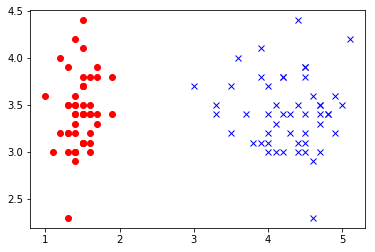

In [68]:
plt.plot(df[df['species'] == 'setosa']['petal_length'], df[df['species'] == 'setosa']['sepal_width'], 'ro')
plt.plot(df[df['species'] == 'versicolor']['petal_length'], df[df['species'] == 'setosa']['sepal_width'], 'bx')
plt.show()

In [83]:
df = df[['petal_length', 'sepal_width', 'species']].sample(frac=1)
df['species'] = df['species'].astype('category').cat.codes

In [125]:
X = np.array(df[['petal_length', 'sepal_width']].T, dtype=np.float128)
Y = np.array(df['species'], dtype=np.float128)
Y = np.reshape(Y, (1, 100))
print(X.shape)
print(Y.shape)

(2, 100)
(1, 100)


In [126]:
def net_input(W, X, b):
    return np.dot(W, X) + b

In [127]:
def sigmoid(Z):
    return 1.0/(1 + np.exp(-Z))

In [128]:
def cost_function(W, X, b, Y):
    return -np.sum(Y * np.log(sigmoid(net_input(W, X, b)))) / X.shape[1]

In [129]:
def cost_function_derivative_w(W, X, b, Y):
    return np.dot(sigmoid(net_input(W, X, b)) - Y, X.T)

In [134]:
def cost_function_derivative_b(W, X, b, Y):
    return np.sum(sigmoid(net_input(W, X, b)) - Y)

In [135]:
def accuracy(W, X, b, Y):
    Y_hat = sigmoid(net_input(W, X, b))
    return np.sum(Y_hat == Y) / Y.shape[1]

In [138]:
print(X.shape)
print(Y.shape)

W = np.zeros((1, X.shape[0]))
b = 0

NUM_ITERATIONS = 10000
LEARNING_RATE = 1

for i in range(NUM_ITERATIONS):
    print('{} step'.format(i))
    print(cost_function_derivative_w(W, X, b, Y))
    W = W - LEARNING_RATE * cost_function_derivative_w(W, X, b, Y)
    b = b - LEARNING_RATE * cost_function_derivative_b(W, X, b, Y)
    print('Accuracy: {}'.format(accuracy(W, X, b, Y)))

(2, 100)
(1, 100)
0 step
[[ 69.9 -16.2]]
Accuracy: 0.0
1 step
[[172.70453325  35.5386381 ]]
Accuracy: 0.0
2 step
[[213.  138.5]]
Accuracy: 0.0
3 step
[[213.  138.5]]
Accuracy: 0.0
4 step
[[213.  138.5]]
Accuracy: 0.0
5 step
[[213.  138.5]]
Accuracy: 0.0
6 step
[[213.  138.5]]
Accuracy: 0.0
7 step
[[213.  138.5]]
Accuracy: 0.0
8 step
[[213.  138.5]]
Accuracy: 0.0
9 step
[[213.  138.5]]
Accuracy: 0.0
10 step
[[213.  138.5]]
Accuracy: 0.0
11 step
[[213.  138.5]]
Accuracy: 0.0
12 step
[[213.  138.5]]
Accuracy: 0.0
13 step
[[213.  138.5]]
Accuracy: 0.0
14 step
[[213.  138.5]]
Accuracy: 0.03
15 step
[[213.  138.5]]
Accuracy: 0.09
16 step
[[213.  138.5]]
Accuracy: 0.25
17 step
[[213.  138.5]]
Accuracy: 0.39
18 step
[[213.  138.5]]
Accuracy: 0.45
19 step
[[213.  138.5]]
Accuracy: 0.48
20 step
[[213.  138.5]]
Accuracy: 0.49
21 step
[[213.  138.5]]
Accuracy: 0.49
22 step
[[213.  138.5]]
Accuracy: 0.5
23 step
[[213.  138.5]]
Accuracy: 0.5
24 step
[[213.  138.5]]
Accuracy: 0.5
25 step
[[213.  138.

/Users/bsalyp/env_python/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  



Accuracy: 0.5
289 step
[[213.  138.5]]
Accuracy: 0.5
290 step
[[213.  138.5]]
Accuracy: 0.5
291 step
[[213.  138.5]]
Accuracy: 0.5
292 step
[[213.  138.5]]
Accuracy: 0.5
293 step
[[213.  138.5]]
Accuracy: 0.5
294 step
[[213.  138.5]]
Accuracy: 0.5
295 step
[[213.  138.5]]
Accuracy: 0.5
296 step
[[213.  138.5]]
Accuracy: 0.5
297 step
[[213.  138.5]]
Accuracy: 0.5
298 step
[[213.  138.5]]
Accuracy: 0.5
299 step
[[213.  138.5]]
Accuracy: 0.5
300 step
[[213.  138.5]]
Accuracy: 0.5
301 step
[[213.  138.5]]
Accuracy: 0.5
302 step
[[213.  138.5]]
Accuracy: 0.5
303 step
[[213.  138.5]]
Accuracy: 0.5
304 step
[[213.  138.5]]
Accuracy: 0.5
305 step
[[213.  138.5]]
Accuracy: 0.5
306 step
[[213.  138.5]]
Accuracy: 0.5
307 step
[[213.  138.5]]
Accuracy: 0.5
308 step
[[213.  138.5]]
Accuracy: 0.5
309 step
[[213.  138.5]]
Accuracy: 0.5
310 step
[[213.  138.5]]
Accuracy: 0.5
311 step
[[213.  138.5]]
Accuracy: 0.5
312 step
[[213.  138.5]]
Accuracy: 0.5
313 step
[[213.  138.5]]
Accuracy: 0.5
314 step
[

Accuracy: 0.5
563 step
[[213.  138.5]]
Accuracy: 0.5
564 step
[[213.  138.5]]
Accuracy: 0.5
565 step
[[213.  138.5]]
Accuracy: 0.5
566 step
[[213.  138.5]]
Accuracy: 0.5
567 step
[[213.  138.5]]
Accuracy: 0.5
568 step
[[213.  138.5]]
Accuracy: 0.5
569 step
[[213.  138.5]]
Accuracy: 0.5
570 step
[[213.  138.5]]
Accuracy: 0.5
571 step
[[213.  138.5]]
Accuracy: 0.5
572 step
[[213.  138.5]]
Accuracy: 0.5
573 step
[[213.  138.5]]
Accuracy: 0.5
574 step
[[213.  138.5]]
Accuracy: 0.5
575 step
[[213.  138.5]]
Accuracy: 0.5
576 step
[[213.  138.5]]
Accuracy: 0.5
577 step
[[213.  138.5]]
Accuracy: 0.5
578 step
[[213.  138.5]]
Accuracy: 0.5
579 step
[[213.  138.5]]
Accuracy: 0.5
580 step
[[213.  138.5]]
Accuracy: 0.5
581 step
[[213.  138.5]]
Accuracy: 0.5
582 step
[[213.  138.5]]
Accuracy: 0.5
583 step
[[213.  138.5]]
Accuracy: 0.5
584 step
[[213.  138.5]]
Accuracy: 0.5
585 step
[[213.  138.5]]
Accuracy: 0.5
586 step
[[213.  138.5]]
Accuracy: 0.5
587 step
[[213.  138.5]]
Accuracy: 0.5
588 step
[[

Accuracy: 0.5
833 step
[[213.  138.5]]
Accuracy: 0.5
834 step
[[213.  138.5]]
Accuracy: 0.5
835 step
[[213.  138.5]]
Accuracy: 0.5
836 step
[[213.  138.5]]
Accuracy: 0.5
837 step
[[213.  138.5]]
Accuracy: 0.5
838 step
[[213.  138.5]]
Accuracy: 0.5
839 step
[[213.  138.5]]
Accuracy: 0.5
840 step
[[213.  138.5]]
Accuracy: 0.5
841 step
[[213.  138.5]]
Accuracy: 0.5
842 step
[[213.  138.5]]
Accuracy: 0.5
843 step
[[213.  138.5]]
Accuracy: 0.5
844 step
[[213.  138.5]]
Accuracy: 0.5
845 step
[[213.  138.5]]
Accuracy: 0.5
846 step
[[213.  138.5]]
Accuracy: 0.5
847 step
[[213.  138.5]]
Accuracy: 0.5
848 step
[[213.  138.5]]
Accuracy: 0.5
849 step
[[213.  138.5]]
Accuracy: 0.5
850 step
[[213.  138.5]]
Accuracy: 0.5
851 step
[[213.  138.5]]
Accuracy: 0.5
852 step
[[213.  138.5]]
Accuracy: 0.5
853 step
[[213.  138.5]]
Accuracy: 0.5
854 step
[[213.  138.5]]
Accuracy: 0.5
855 step
[[213.  138.5]]
Accuracy: 0.5
856 step
[[213.  138.5]]
Accuracy: 0.5
857 step
[[213.  138.5]]
Accuracy: 0.5
858 step
[[

[[213.  138.5]]
Accuracy: 0.5
1100 step
[[213.  138.5]]
Accuracy: 0.5
1101 step
[[213.  138.5]]
Accuracy: 0.5
1102 step
[[213.  138.5]]
Accuracy: 0.5
1103 step
[[213.  138.5]]
Accuracy: 0.5
1104 step
[[213.  138.5]]
Accuracy: 0.5
1105 step
[[213.  138.5]]
Accuracy: 0.5
1106 step
[[213.  138.5]]
Accuracy: 0.5
1107 step
[[213.  138.5]]
Accuracy: 0.5
1108 step
[[213.  138.5]]
Accuracy: 0.5
1109 step
[[213.  138.5]]
Accuracy: 0.5
1110 step
[[213.  138.5]]
Accuracy: 0.5
1111 step
[[213.  138.5]]
Accuracy: 0.5
1112 step
[[213.  138.5]]
Accuracy: 0.5
1113 step
[[213.  138.5]]
Accuracy: 0.5
1114 step
[[213.  138.5]]
Accuracy: 0.5
1115 step
[[213.  138.5]]
Accuracy: 0.5
1116 step
[[213.  138.5]]
Accuracy: 0.5
1117 step
[[213.  138.5]]
Accuracy: 0.5
1118 step
[[213.  138.5]]
Accuracy: 0.5
1119 step
[[213.  138.5]]
Accuracy: 0.5
1120 step
[[213.  138.5]]
Accuracy: 0.5
1121 step
[[213.  138.5]]
Accuracy: 0.5
1122 step
[[213.  138.5]]
Accuracy: 0.5
1123 step
[[213.  138.5]]
Accuracy: 0.5
1124 step


[[213.  138.5]]
Accuracy: 0.5
1360 step
[[213.  138.5]]
Accuracy: 0.5
1361 step
[[213.  138.5]]
Accuracy: 0.5
1362 step
[[213.  138.5]]
Accuracy: 0.5
1363 step
[[213.  138.5]]
Accuracy: 0.5
1364 step
[[213.  138.5]]
Accuracy: 0.5
1365 step
[[213.  138.5]]
Accuracy: 0.5
1366 step
[[213.  138.5]]
Accuracy: 0.5
1367 step
[[213.  138.5]]
Accuracy: 0.5
1368 step
[[213.  138.5]]
Accuracy: 0.5
1369 step
[[213.  138.5]]
Accuracy: 0.5
1370 step
[[213.  138.5]]
Accuracy: 0.5
1371 step
[[213.  138.5]]
Accuracy: 0.5
1372 step
[[213.  138.5]]
Accuracy: 0.5
1373 step
[[213.  138.5]]
Accuracy: 0.5
1374 step
[[213.  138.5]]
Accuracy: 0.5
1375 step
[[213.  138.5]]
Accuracy: 0.5
1376 step
[[213.  138.5]]
Accuracy: 0.5
1377 step
[[213.  138.5]]
Accuracy: 0.5
1378 step
[[213.  138.5]]
Accuracy: 0.5
1379 step
[[213.  138.5]]
Accuracy: 0.5
1380 step
[[213.  138.5]]
Accuracy: 0.5
1381 step
[[213.  138.5]]
Accuracy: 0.5
1382 step
[[213.  138.5]]
Accuracy: 0.5
1383 step
[[213.  138.5]]
Accuracy: 0.5
1384 step


[[213.  138.5]]
Accuracy: 0.5
1624 step
[[213.  138.5]]
Accuracy: 0.5
1625 step
[[213.  138.5]]
Accuracy: 0.5
1626 step
[[213.  138.5]]
Accuracy: 0.5
1627 step
[[213.  138.5]]
Accuracy: 0.5
1628 step
[[213.  138.5]]
Accuracy: 0.5
1629 step
[[213.  138.5]]
Accuracy: 0.5
1630 step
[[213.  138.5]]
Accuracy: 0.5
1631 step
[[213.  138.5]]
Accuracy: 0.5
1632 step
[[213.  138.5]]
Accuracy: 0.5
1633 step
[[213.  138.5]]
Accuracy: 0.5
1634 step
[[213.  138.5]]
Accuracy: 0.5
1635 step
[[213.  138.5]]
Accuracy: 0.5
1636 step
[[213.  138.5]]
Accuracy: 0.5
1637 step
[[213.  138.5]]
Accuracy: 0.5
1638 step
[[213.  138.5]]
Accuracy: 0.5
1639 step
[[213.  138.5]]
Accuracy: 0.5
1640 step
[[213.  138.5]]
Accuracy: 0.5
1641 step
[[213.  138.5]]
Accuracy: 0.5
1642 step
[[213.  138.5]]
Accuracy: 0.5
1643 step
[[213.  138.5]]
Accuracy: 0.5
1644 step
[[213.  138.5]]
Accuracy: 0.5
1645 step
[[213.  138.5]]
Accuracy: 0.5
1646 step
[[213.  138.5]]
Accuracy: 0.5
1647 step
[[213.  138.5]]
Accuracy: 0.5
1648 step


[[213.  138.5]]
Accuracy: 0.5
1889 step
[[213.  138.5]]
Accuracy: 0.5
1890 step
[[213.  138.5]]
Accuracy: 0.5
1891 step
[[213.  138.5]]
Accuracy: 0.5
1892 step
[[213.  138.5]]
Accuracy: 0.5
1893 step
[[213.  138.5]]
Accuracy: 0.5
1894 step
[[213.  138.5]]
Accuracy: 0.5
1895 step
[[213.  138.5]]
Accuracy: 0.5
1896 step
[[213.  138.5]]
Accuracy: 0.5
1897 step
[[213.  138.5]]
Accuracy: 0.5
1898 step
[[213.  138.5]]
Accuracy: 0.5
1899 step
[[213.  138.5]]
Accuracy: 0.5
1900 step
[[213.  138.5]]
Accuracy: 0.5
1901 step
[[213.  138.5]]
Accuracy: 0.5
1902 step
[[213.  138.5]]
Accuracy: 0.5
1903 step
[[213.  138.5]]
Accuracy: 0.5
1904 step
[[213.  138.5]]
Accuracy: 0.5
1905 step
[[213.  138.5]]
Accuracy: 0.5
1906 step
[[213.  138.5]]
Accuracy: 0.5
1907 step
[[213.  138.5]]
Accuracy: 0.5
1908 step
[[213.  138.5]]
Accuracy: 0.5
1909 step
[[213.  138.5]]
Accuracy: 0.5
1910 step
[[213.  138.5]]
Accuracy: 0.5
1911 step
[[213.  138.5]]
Accuracy: 0.5
1912 step
[[213.  138.5]]
Accuracy: 0.5
1913 step


[[213.  138.5]]
Accuracy: 0.5
2169 step
[[213.  138.5]]
Accuracy: 0.5
2170 step
[[213.  138.5]]
Accuracy: 0.5
2171 step
[[213.  138.5]]
Accuracy: 0.5
2172 step
[[213.  138.5]]
Accuracy: 0.5
2173 step
[[213.  138.5]]
Accuracy: 0.5
2174 step
[[213.  138.5]]
Accuracy: 0.5
2175 step
[[213.  138.5]]
Accuracy: 0.5
2176 step
[[213.  138.5]]
Accuracy: 0.5
2177 step
[[213.  138.5]]
Accuracy: 0.5
2178 step
[[213.  138.5]]
Accuracy: 0.5
2179 step
[[213.  138.5]]
Accuracy: 0.5
2180 step
[[213.  138.5]]
Accuracy: 0.5
2181 step
[[213.  138.5]]
Accuracy: 0.5
2182 step
[[213.  138.5]]
Accuracy: 0.5
2183 step
[[213.  138.5]]
Accuracy: 0.5
2184 step
[[213.  138.5]]
Accuracy: 0.5
2185 step
[[213.  138.5]]
Accuracy: 0.5
2186 step
[[213.  138.5]]
Accuracy: 0.5
2187 step
[[213.  138.5]]
Accuracy: 0.5
2188 step
[[213.  138.5]]
Accuracy: 0.5
2189 step
[[213.  138.5]]
Accuracy: 0.5
2190 step
[[213.  138.5]]
Accuracy: 0.5
2191 step
[[213.  138.5]]
Accuracy: 0.5
2192 step
[[213.  138.5]]
Accuracy: 0.5
2193 step


[[213.  138.5]]
Accuracy: 0.5
2451 step
[[213.  138.5]]
Accuracy: 0.5
2452 step
[[213.  138.5]]
Accuracy: 0.5
2453 step
[[213.  138.5]]
Accuracy: 0.5
2454 step
[[213.  138.5]]
Accuracy: 0.5
2455 step
[[213.  138.5]]
Accuracy: 0.5
2456 step
[[213.  138.5]]
Accuracy: 0.5
2457 step
[[213.  138.5]]
Accuracy: 0.5
2458 step
[[213.  138.5]]
Accuracy: 0.5
2459 step
[[213.  138.5]]
Accuracy: 0.5
2460 step
[[213.  138.5]]
Accuracy: 0.5
2461 step
[[213.  138.5]]
Accuracy: 0.5
2462 step
[[213.  138.5]]
Accuracy: 0.5
2463 step
[[213.  138.5]]
Accuracy: 0.5
2464 step
[[213.  138.5]]
Accuracy: 0.5
2465 step
[[213.  138.5]]
Accuracy: 0.5
2466 step
[[213.  138.5]]
Accuracy: 0.5
2467 step
[[213.  138.5]]
Accuracy: 0.5
2468 step
[[213.  138.5]]
Accuracy: 0.5
2469 step
[[213.  138.5]]
Accuracy: 0.5
2470 step
[[213.  138.5]]
Accuracy: 0.5
2471 step
[[213.  138.5]]
Accuracy: 0.5
2472 step
[[213.  138.5]]
Accuracy: 0.5
2473 step
[[213.  138.5]]
Accuracy: 0.5
2474 step
[[213.  138.5]]
Accuracy: 0.5
2475 step


[[213.  138.5]]
Accuracy: 0.5
2724 step
[[213.  138.5]]
Accuracy: 0.5
2725 step
[[213.  138.5]]
Accuracy: 0.5
2726 step
[[213.  138.5]]
Accuracy: 0.5
2727 step
[[213.  138.5]]
Accuracy: 0.5
2728 step
[[213.  138.5]]
Accuracy: 0.5
2729 step
[[213.  138.5]]
Accuracy: 0.5
2730 step
[[213.  138.5]]
Accuracy: 0.5
2731 step
[[213.  138.5]]
Accuracy: 0.5
2732 step
[[213.  138.5]]
Accuracy: 0.5
2733 step
[[213.  138.5]]
Accuracy: 0.5
2734 step
[[213.  138.5]]
Accuracy: 0.5
2735 step
[[213.  138.5]]
Accuracy: 0.5
2736 step
[[213.  138.5]]
Accuracy: 0.5
2737 step
[[213.  138.5]]
Accuracy: 0.5
2738 step
[[213.  138.5]]
Accuracy: 0.5
2739 step
[[213.  138.5]]
Accuracy: 0.5
2740 step
[[213.  138.5]]
Accuracy: 0.5
2741 step
[[213.  138.5]]
Accuracy: 0.5
2742 step
[[213.  138.5]]
Accuracy: 0.5
2743 step
[[213.  138.5]]
Accuracy: 0.5
2744 step
[[213.  138.5]]
Accuracy: 0.5
2745 step
[[213.  138.5]]
Accuracy: 0.5
2746 step
[[213.  138.5]]
Accuracy: 0.5
2747 step
[[213.  138.5]]
Accuracy: 0.5
2748 step


Accuracy: 0.5
3009 step
[[213.  138.5]]
Accuracy: 0.5
3010 step
[[213.  138.5]]
Accuracy: 0.5
3011 step
[[213.  138.5]]
Accuracy: 0.5
3012 step
[[213.  138.5]]
Accuracy: 0.5
3013 step
[[213.  138.5]]
Accuracy: 0.5
3014 step
[[213.  138.5]]
Accuracy: 0.5
3015 step
[[213.  138.5]]
Accuracy: 0.5
3016 step
[[213.  138.5]]
Accuracy: 0.5
3017 step
[[213.  138.5]]
Accuracy: 0.5
3018 step
[[213.  138.5]]
Accuracy: 0.5
3019 step
[[213.  138.5]]
Accuracy: 0.5
3020 step
[[213.  138.5]]
Accuracy: 0.5
3021 step
[[213.  138.5]]
Accuracy: 0.5
3022 step
[[213.  138.5]]
Accuracy: 0.5
3023 step
[[213.  138.5]]
Accuracy: 0.5
3024 step
[[213.  138.5]]
Accuracy: 0.5
3025 step
[[213.  138.5]]
Accuracy: 0.5
3026 step
[[213.  138.5]]
Accuracy: 0.5
3027 step
[[213.  138.5]]
Accuracy: 0.5
3028 step
[[213.  138.5]]
Accuracy: 0.5
3029 step
[[213.  138.5]]
Accuracy: 0.5
3030 step
[[213.  138.5]]
Accuracy: 0.5
3031 step
[[213.  138.5]]
Accuracy: 0.5
3032 step
[[213.  138.5]]
Accuracy: 0.5
3033 step
[[213.  138.5]]


Accuracy: 0.5
3275 step
[[213.  138.5]]
Accuracy: 0.5
3276 step
[[213.  138.5]]
Accuracy: 0.5
3277 step
[[213.  138.5]]
Accuracy: 0.5
3278 step
[[213.  138.5]]
Accuracy: 0.5
3279 step
[[213.  138.5]]
Accuracy: 0.5
3280 step
[[213.  138.5]]
Accuracy: 0.5
3281 step
[[213.  138.5]]
Accuracy: 0.5
3282 step
[[213.  138.5]]
Accuracy: 0.5
3283 step
[[213.  138.5]]
Accuracy: 0.5
3284 step
[[213.  138.5]]
Accuracy: 0.5
3285 step
[[213.  138.5]]
Accuracy: 0.5
3286 step
[[213.  138.5]]
Accuracy: 0.5
3287 step
[[213.  138.5]]
Accuracy: 0.5
3288 step
[[213.  138.5]]
Accuracy: 0.5
3289 step
[[213.  138.5]]
Accuracy: 0.5
3290 step
[[213.  138.5]]
Accuracy: 0.5
3291 step
[[213.  138.5]]
Accuracy: 0.5
3292 step
[[213.  138.5]]
Accuracy: 0.5
3293 step
[[213.  138.5]]
Accuracy: 0.5
3294 step
[[213.  138.5]]
Accuracy: 0.5
3295 step
[[213.  138.5]]
Accuracy: 0.5
3296 step
[[213.  138.5]]
Accuracy: 0.5
3297 step
[[213.  138.5]]
Accuracy: 0.5
3298 step
[[213.  138.5]]
Accuracy: 0.5
3299 step
[[213.  138.5]]


[[213.  138.5]]
Accuracy: 0.5
3550 step
[[213.  138.5]]
Accuracy: 0.5
3551 step
[[213.  138.5]]
Accuracy: 0.5
3552 step
[[213.  138.5]]
Accuracy: 0.5
3553 step
[[213.  138.5]]
Accuracy: 0.5
3554 step
[[213.  138.5]]
Accuracy: 0.5
3555 step
[[213.  138.5]]
Accuracy: 0.5
3556 step
[[213.  138.5]]
Accuracy: 0.5
3557 step
[[213.  138.5]]
Accuracy: 0.5
3558 step
[[213.  138.5]]
Accuracy: 0.5
3559 step
[[213.  138.5]]
Accuracy: 0.5
3560 step
[[213.  138.5]]
Accuracy: 0.5
3561 step
[[213.  138.5]]
Accuracy: 0.5
3562 step
[[213.  138.5]]
Accuracy: 0.5
3563 step
[[213.  138.5]]
Accuracy: 0.5
3564 step
[[213.  138.5]]
Accuracy: 0.5
3565 step
[[213.  138.5]]
Accuracy: 0.5
3566 step
[[213.  138.5]]
Accuracy: 0.5
3567 step
[[213.  138.5]]
Accuracy: 0.5
3568 step
[[213.  138.5]]
Accuracy: 0.5
3569 step
[[213.  138.5]]
Accuracy: 0.5
3570 step
[[213.  138.5]]
Accuracy: 0.5
3571 step
[[213.  138.5]]
Accuracy: 0.5
3572 step
[[213.  138.5]]
Accuracy: 0.5
3573 step
[[213.  138.5]]
Accuracy: 0.5
3574 step


[[213.  138.5]]
Accuracy: 0.5
3822 step
[[213.  138.5]]
Accuracy: 0.5
3823 step
[[213.  138.5]]
Accuracy: 0.5
3824 step
[[213.  138.5]]
Accuracy: 0.5
3825 step
[[213.  138.5]]
Accuracy: 0.5
3826 step
[[213.  138.5]]
Accuracy: 0.5
3827 step
[[213.  138.5]]
Accuracy: 0.5
3828 step
[[213.  138.5]]
Accuracy: 0.5
3829 step
[[213.  138.5]]
Accuracy: 0.5
3830 step
[[213.  138.5]]
Accuracy: 0.5
3831 step
[[213.  138.5]]
Accuracy: 0.5
3832 step
[[213.  138.5]]
Accuracy: 0.5
3833 step
[[213.  138.5]]
Accuracy: 0.5
3834 step
[[213.  138.5]]
Accuracy: 0.5
3835 step
[[213.  138.5]]
Accuracy: 0.5
3836 step
[[213.  138.5]]
Accuracy: 0.5
3837 step
[[213.  138.5]]
Accuracy: 0.5
3838 step
[[213.  138.5]]
Accuracy: 0.5
3839 step
[[213.  138.5]]
Accuracy: 0.5
3840 step
[[213.  138.5]]
Accuracy: 0.5
3841 step
[[213.  138.5]]
Accuracy: 0.5
3842 step
[[213.  138.5]]
Accuracy: 0.5
3843 step
[[213.  138.5]]
Accuracy: 0.5
3844 step
[[213.  138.5]]
Accuracy: 0.5
3845 step
[[213.  138.5]]
Accuracy: 0.5
3846 step


Accuracy: 0.5
4087 step
[[213.  138.5]]
Accuracy: 0.5
4088 step
[[213.  138.5]]
Accuracy: 0.5
4089 step
[[213.  138.5]]
Accuracy: 0.5
4090 step
[[213.  138.5]]
Accuracy: 0.5
4091 step
[[213.  138.5]]
Accuracy: 0.5
4092 step
[[213.  138.5]]
Accuracy: 0.5
4093 step
[[213.  138.5]]
Accuracy: 0.5
4094 step
[[213.  138.5]]
Accuracy: 0.5
4095 step
[[213.  138.5]]
Accuracy: 0.5
4096 step
[[213.  138.5]]
Accuracy: 0.5
4097 step
[[213.  138.5]]
Accuracy: 0.5
4098 step
[[213.  138.5]]
Accuracy: 0.5
4099 step
[[213.  138.5]]
Accuracy: 0.5
4100 step
[[213.  138.5]]
Accuracy: 0.5
4101 step
[[213.  138.5]]
Accuracy: 0.5
4102 step
[[213.  138.5]]
Accuracy: 0.5
4103 step
[[213.  138.5]]
Accuracy: 0.5
4104 step
[[213.  138.5]]
Accuracy: 0.5
4105 step
[[213.  138.5]]
Accuracy: 0.5
4106 step
[[213.  138.5]]
Accuracy: 0.5
4107 step
[[213.  138.5]]
Accuracy: 0.5
4108 step
[[213.  138.5]]
Accuracy: 0.5
4109 step
[[213.  138.5]]
Accuracy: 0.5
4110 step
[[213.  138.5]]
Accuracy: 0.5
4111 step
[[213.  138.5]]


[[213.  138.5]]
Accuracy: 0.5
4354 step
[[213.  138.5]]
Accuracy: 0.5
4355 step
[[213.  138.5]]
Accuracy: 0.5
4356 step
[[213.  138.5]]
Accuracy: 0.5
4357 step
[[213.  138.5]]
Accuracy: 0.5
4358 step
[[213.  138.5]]
Accuracy: 0.5
4359 step
[[213.  138.5]]
Accuracy: 0.5
4360 step
[[213.  138.5]]
Accuracy: 0.5
4361 step
[[213.  138.5]]
Accuracy: 0.5
4362 step
[[213.  138.5]]
Accuracy: 0.5
4363 step
[[213.  138.5]]
Accuracy: 0.5
4364 step
[[213.  138.5]]
Accuracy: 0.5
4365 step
[[213.  138.5]]
Accuracy: 0.5
4366 step
[[213.  138.5]]
Accuracy: 0.5
4367 step
[[213.  138.5]]
Accuracy: 0.5
4368 step
[[213.  138.5]]
Accuracy: 0.5
4369 step
[[213.  138.5]]
Accuracy: 0.5
4370 step
[[213.  138.5]]
Accuracy: 0.5
4371 step
[[213.  138.5]]
Accuracy: 0.5
4372 step
[[213.  138.5]]
Accuracy: 0.5
4373 step
[[213.  138.5]]
Accuracy: 0.5
4374 step
[[213.  138.5]]
Accuracy: 0.5
4375 step
[[213.  138.5]]
Accuracy: 0.5
4376 step
[[213.  138.5]]
Accuracy: 0.5
4377 step
[[213.  138.5]]
Accuracy: 0.5
4378 step


[[213.  138.5]]
Accuracy: 0.5
4628 step
[[213.  138.5]]
Accuracy: 0.5
4629 step
[[213.  138.5]]
Accuracy: 0.5
4630 step
[[213.  138.5]]
Accuracy: 0.5
4631 step
[[213.  138.5]]
Accuracy: 0.5
4632 step
[[213.  138.5]]
Accuracy: 0.5
4633 step
[[213.  138.5]]
Accuracy: 0.5
4634 step
[[213.  138.5]]
Accuracy: 0.5
4635 step
[[213.  138.5]]
Accuracy: 0.5
4636 step
[[213.  138.5]]
Accuracy: 0.5
4637 step
[[213.  138.5]]
Accuracy: 0.5
4638 step
[[213.  138.5]]
Accuracy: 0.5
4639 step
[[213.  138.5]]
Accuracy: 0.5
4640 step
[[213.  138.5]]
Accuracy: 0.5
4641 step
[[213.  138.5]]
Accuracy: 0.5
4642 step
[[213.  138.5]]
Accuracy: 0.5
4643 step
[[213.  138.5]]
Accuracy: 0.5
4644 step
[[213.  138.5]]
Accuracy: 0.5
4645 step
[[213.  138.5]]
Accuracy: 0.5
4646 step
[[213.  138.5]]
Accuracy: 0.5
4647 step
[[213.  138.5]]
Accuracy: 0.5
4648 step
[[213.  138.5]]
Accuracy: 0.5
4649 step
[[213.  138.5]]
Accuracy: 0.5
4650 step
[[213.  138.5]]
Accuracy: 0.5
4651 step
[[213.  138.5]]
Accuracy: 0.5
4652 step


[[213.  138.5]]
Accuracy: 0.5
4889 step
[[213.  138.5]]
Accuracy: 0.5
4890 step
[[213.  138.5]]
Accuracy: 0.5
4891 step
[[213.  138.5]]
Accuracy: 0.5
4892 step
[[213.  138.5]]
Accuracy: 0.5
4893 step
[[213.  138.5]]
Accuracy: 0.5
4894 step
[[213.  138.5]]
Accuracy: 0.5
4895 step
[[213.  138.5]]
Accuracy: 0.5
4896 step
[[213.  138.5]]
Accuracy: 0.5
4897 step
[[213.  138.5]]
Accuracy: 0.5
4898 step
[[213.  138.5]]
Accuracy: 0.5
4899 step
[[213.  138.5]]
Accuracy: 0.5
4900 step
[[213.  138.5]]
Accuracy: 0.5
4901 step
[[213.  138.5]]
Accuracy: 0.5
4902 step
[[213.  138.5]]
Accuracy: 0.5
4903 step
[[213.  138.5]]
Accuracy: 0.5
4904 step
[[213.  138.5]]
Accuracy: 0.5
4905 step
[[213.  138.5]]
Accuracy: 0.5
4906 step
[[213.  138.5]]
Accuracy: 0.5
4907 step
[[213.  138.5]]
Accuracy: 0.5
4908 step
[[213.  138.5]]
Accuracy: 0.5
4909 step
[[213.  138.5]]
Accuracy: 0.5
4910 step
[[213.  138.5]]
Accuracy: 0.5
4911 step
[[213.  138.5]]
Accuracy: 0.5
4912 step
[[213.  138.5]]
Accuracy: 0.5
4913 step


[[213.  138.5]]
Accuracy: 0.5
5158 step
[[213.  138.5]]
Accuracy: 0.5
5159 step
[[213.  138.5]]
Accuracy: 0.5
5160 step
[[213.  138.5]]
Accuracy: 0.5
5161 step
[[213.  138.5]]
Accuracy: 0.5
5162 step
[[213.  138.5]]
Accuracy: 0.5
5163 step
[[213.  138.5]]
Accuracy: 0.5
5164 step
[[213.  138.5]]
Accuracy: 0.5
5165 step
[[213.  138.5]]
Accuracy: 0.5
5166 step
[[213.  138.5]]
Accuracy: 0.5
5167 step
[[213.  138.5]]
Accuracy: 0.5
5168 step
[[213.  138.5]]
Accuracy: 0.5
5169 step
[[213.  138.5]]
Accuracy: 0.5
5170 step
[[213.  138.5]]
Accuracy: 0.5
5171 step
[[213.  138.5]]
Accuracy: 0.5
5172 step
[[213.  138.5]]
Accuracy: 0.5
5173 step
[[213.  138.5]]
Accuracy: 0.5
5174 step
[[213.  138.5]]
Accuracy: 0.5
5175 step
[[213.  138.5]]
Accuracy: 0.5
5176 step
[[213.  138.5]]
Accuracy: 0.5
5177 step
[[213.  138.5]]
Accuracy: 0.5
5178 step
[[213.  138.5]]
Accuracy: 0.5
5179 step
[[213.  138.5]]
Accuracy: 0.5
5180 step
[[213.  138.5]]
Accuracy: 0.5
5181 step
[[213.  138.5]]
Accuracy: 0.5
5182 step


[[213.  138.5]]
Accuracy: 0.5
5429 step
[[213.  138.5]]
Accuracy: 0.5
5430 step
[[213.  138.5]]
Accuracy: 0.5
5431 step
[[213.  138.5]]
Accuracy: 0.5
5432 step
[[213.  138.5]]
Accuracy: 0.5
5433 step
[[213.  138.5]]
Accuracy: 0.5
5434 step
[[213.  138.5]]
Accuracy: 0.5
5435 step
[[213.  138.5]]
Accuracy: 0.5
5436 step
[[213.  138.5]]
Accuracy: 0.5
5437 step
[[213.  138.5]]
Accuracy: 0.5
5438 step
[[213.  138.5]]
Accuracy: 0.5
5439 step
[[213.  138.5]]
Accuracy: 0.5
5440 step
[[213.  138.5]]
Accuracy: 0.5
5441 step
[[213.  138.5]]
Accuracy: 0.5
5442 step
[[213.  138.5]]
Accuracy: 0.5
5443 step
[[213.  138.5]]
Accuracy: 0.5
5444 step
[[213.  138.5]]
Accuracy: 0.5
5445 step
[[213.  138.5]]
Accuracy: 0.5
5446 step
[[213.  138.5]]
Accuracy: 0.5
5447 step
[[213.  138.5]]
Accuracy: 0.5
5448 step
[[213.  138.5]]
Accuracy: 0.5
5449 step
[[213.  138.5]]
Accuracy: 0.5
5450 step
[[213.  138.5]]
Accuracy: 0.5
5451 step
[[213.  138.5]]
Accuracy: 0.5
5452 step
[[213.  138.5]]
Accuracy: 0.5
5453 step


Accuracy: 0.5
5700 step
[[213.  138.5]]
Accuracy: 0.5
5701 step
[[213.  138.5]]
Accuracy: 0.5
5702 step
[[213.  138.5]]
Accuracy: 0.5
5703 step
[[213.  138.5]]
Accuracy: 0.5
5704 step
[[213.  138.5]]
Accuracy: 0.5
5705 step
[[213.  138.5]]
Accuracy: 0.5
5706 step
[[213.  138.5]]
Accuracy: 0.5
5707 step
[[213.  138.5]]
Accuracy: 0.5
5708 step
[[213.  138.5]]
Accuracy: 0.5
5709 step
[[213.  138.5]]
Accuracy: 0.5
5710 step
[[213.  138.5]]
Accuracy: 0.5
5711 step
[[213.  138.5]]
Accuracy: 0.5
5712 step
[[213.  138.5]]
Accuracy: 0.5
5713 step
[[213.  138.5]]
Accuracy: 0.5
5714 step
[[213.  138.5]]
Accuracy: 0.5
5715 step
[[213.  138.5]]
Accuracy: 0.5
5716 step
[[213.  138.5]]
Accuracy: 0.5
5717 step
[[213.  138.5]]
Accuracy: 0.5
5718 step
[[213.  138.5]]
Accuracy: 0.5
5719 step
[[213.  138.5]]
Accuracy: 0.5
5720 step
[[213.  138.5]]
Accuracy: 0.5
5721 step
[[213.  138.5]]
Accuracy: 0.5
5722 step
[[213.  138.5]]
Accuracy: 0.5
5723 step
[[213.  138.5]]
Accuracy: 0.5
5724 step
[[213.  138.5]]


Accuracy: 0.5
5975 step
[[213.  138.5]]
Accuracy: 0.5
5976 step
[[213.  138.5]]
Accuracy: 0.5
5977 step
[[213.  138.5]]
Accuracy: 0.5
5978 step
[[213.  138.5]]
Accuracy: 0.5
5979 step
[[213.  138.5]]
Accuracy: 0.5
5980 step
[[213.  138.5]]
Accuracy: 0.5
5981 step
[[213.  138.5]]
Accuracy: 0.5
5982 step
[[213.  138.5]]
Accuracy: 0.5
5983 step
[[213.  138.5]]
Accuracy: 0.5
5984 step
[[213.  138.5]]
Accuracy: 0.5
5985 step
[[213.  138.5]]
Accuracy: 0.5
5986 step
[[213.  138.5]]
Accuracy: 0.5
5987 step
[[213.  138.5]]
Accuracy: 0.5
5988 step
[[213.  138.5]]
Accuracy: 0.5
5989 step
[[213.  138.5]]
Accuracy: 0.5
5990 step
[[213.  138.5]]
Accuracy: 0.5
5991 step
[[213.  138.5]]
Accuracy: 0.5
5992 step
[[213.  138.5]]
Accuracy: 0.5
5993 step
[[213.  138.5]]
Accuracy: 0.5
5994 step
[[213.  138.5]]
Accuracy: 0.5
5995 step
[[213.  138.5]]
Accuracy: 0.5
5996 step
[[213.  138.5]]
Accuracy: 0.5
5997 step
[[213.  138.5]]
Accuracy: 0.5
5998 step
[[213.  138.5]]
Accuracy: 0.5
5999 step
[[213.  138.5]]


Accuracy: 0.5
6256 step
[[213.  138.5]]
Accuracy: 0.5
6257 step
[[213.  138.5]]
Accuracy: 0.5
6258 step
[[213.  138.5]]
Accuracy: 0.5
6259 step
[[213.  138.5]]
Accuracy: 0.5
6260 step
[[213.  138.5]]
Accuracy: 0.5
6261 step
[[213.  138.5]]
Accuracy: 0.5
6262 step
[[213.  138.5]]
Accuracy: 0.5
6263 step
[[213.  138.5]]
Accuracy: 0.5
6264 step
[[213.  138.5]]
Accuracy: 0.5
6265 step
[[213.  138.5]]
Accuracy: 0.5
6266 step
[[213.  138.5]]
Accuracy: 0.5
6267 step
[[213.  138.5]]
Accuracy: 0.5
6268 step
[[213.  138.5]]
Accuracy: 0.5
6269 step
[[213.  138.5]]
Accuracy: 0.5
6270 step
[[213.  138.5]]
Accuracy: 0.5
6271 step
[[213.  138.5]]
Accuracy: 0.5
6272 step
[[213.  138.5]]
Accuracy: 0.5
6273 step
[[213.  138.5]]
Accuracy: 0.5
6274 step
[[213.  138.5]]
Accuracy: 0.5
6275 step
[[213.  138.5]]
Accuracy: 0.5
6276 step
[[213.  138.5]]
Accuracy: 0.5
6277 step
[[213.  138.5]]
Accuracy: 0.5
6278 step
[[213.  138.5]]
Accuracy: 0.5
6279 step
[[213.  138.5]]
Accuracy: 0.5
6280 step
[[213.  138.5]]


Accuracy: 0.5
6534 step
[[213.  138.5]]
Accuracy: 0.5
6535 step
[[213.  138.5]]
Accuracy: 0.5
6536 step
[[213.  138.5]]
Accuracy: 0.5
6537 step
[[213.  138.5]]
Accuracy: 0.5
6538 step
[[213.  138.5]]
Accuracy: 0.5
6539 step
[[213.  138.5]]
Accuracy: 0.5
6540 step
[[213.  138.5]]
Accuracy: 0.5
6541 step
[[213.  138.5]]
Accuracy: 0.5
6542 step
[[213.  138.5]]
Accuracy: 0.5
6543 step
[[213.  138.5]]
Accuracy: 0.5
6544 step
[[213.  138.5]]
Accuracy: 0.5
6545 step
[[213.  138.5]]
Accuracy: 0.5
6546 step
[[213.  138.5]]
Accuracy: 0.5
6547 step
[[213.  138.5]]
Accuracy: 0.5
6548 step
[[213.  138.5]]
Accuracy: 0.5
6549 step
[[213.  138.5]]
Accuracy: 0.5
6550 step
[[213.  138.5]]
Accuracy: 0.5
6551 step
[[213.  138.5]]
Accuracy: 0.5
6552 step
[[213.  138.5]]
Accuracy: 0.5
6553 step
[[213.  138.5]]
Accuracy: 0.5
6554 step
[[213.  138.5]]
Accuracy: 0.5
6555 step
[[213.  138.5]]
Accuracy: 0.5
6556 step
[[213.  138.5]]
Accuracy: 0.5
6557 step
[[213.  138.5]]
Accuracy: 0.5
6558 step
[[213.  138.5]]


[[213.  138.5]]
Accuracy: 0.5
6807 step
[[213.  138.5]]
Accuracy: 0.5
6808 step
[[213.  138.5]]
Accuracy: 0.5
6809 step
[[213.  138.5]]
Accuracy: 0.5
6810 step
[[213.  138.5]]
Accuracy: 0.5
6811 step
[[213.  138.5]]
Accuracy: 0.5
6812 step
[[213.  138.5]]
Accuracy: 0.5
6813 step
[[213.  138.5]]
Accuracy: 0.5
6814 step
[[213.  138.5]]
Accuracy: 0.5
6815 step
[[213.  138.5]]
Accuracy: 0.5
6816 step
[[213.  138.5]]
Accuracy: 0.5
6817 step
[[213.  138.5]]
Accuracy: 0.5
6818 step
[[213.  138.5]]
Accuracy: 0.5
6819 step
[[213.  138.5]]
Accuracy: 0.5
6820 step
[[213.  138.5]]
Accuracy: 0.5
6821 step
[[213.  138.5]]
Accuracy: 0.5
6822 step
[[213.  138.5]]
Accuracy: 0.5
6823 step
[[213.  138.5]]
Accuracy: 0.5
6824 step
[[213.  138.5]]
Accuracy: 0.5
6825 step
[[213.  138.5]]
Accuracy: 0.5
6826 step
[[213.  138.5]]
Accuracy: 0.5
6827 step
[[213.  138.5]]
Accuracy: 0.5
6828 step
[[213.  138.5]]
Accuracy: 0.5
6829 step
[[213.  138.5]]
Accuracy: 0.5
6830 step
[[213.  138.5]]
Accuracy: 0.5
6831 step


Accuracy: 0.5
7080 step
[[213.  138.5]]
Accuracy: 0.5
7081 step
[[213.  138.5]]
Accuracy: 0.5
7082 step
[[213.  138.5]]
Accuracy: 0.5
7083 step
[[213.  138.5]]
Accuracy: 0.5
7084 step
[[213.  138.5]]
Accuracy: 0.5
7085 step
[[213.  138.5]]
Accuracy: 0.5
7086 step
[[213.  138.5]]
Accuracy: 0.5
7087 step
[[213.  138.5]]
Accuracy: 0.5
7088 step
[[213.  138.5]]
Accuracy: 0.5
7089 step
[[213.  138.5]]
Accuracy: 0.5
7090 step
[[213.  138.5]]
Accuracy: 0.5
7091 step
[[213.  138.5]]
Accuracy: 0.5
7092 step
[[213.  138.5]]
Accuracy: 0.5
7093 step
[[213.  138.5]]
Accuracy: 0.5
7094 step
[[213.  138.5]]
Accuracy: 0.5
7095 step
[[213.  138.5]]
Accuracy: 0.5
7096 step
[[213.  138.5]]
Accuracy: 0.5
7097 step
[[213.  138.5]]
Accuracy: 0.5
7098 step
[[213.  138.5]]
Accuracy: 0.5
7099 step
[[213.  138.5]]
Accuracy: 0.5
7100 step
[[213.  138.5]]
Accuracy: 0.5
7101 step
[[213.  138.5]]
Accuracy: 0.5
7102 step
[[213.  138.5]]
Accuracy: 0.5
7103 step
[[213.  138.5]]
Accuracy: 0.5
7104 step
[[213.  138.5]]


[[213.  138.5]]
Accuracy: 0.5
7347 step
[[213.  138.5]]
Accuracy: 0.5
7348 step
[[213.  138.5]]
Accuracy: 0.5
7349 step
[[213.  138.5]]
Accuracy: 0.5
7350 step
[[213.  138.5]]
Accuracy: 0.5
7351 step
[[213.  138.5]]
Accuracy: 0.5
7352 step
[[213.  138.5]]
Accuracy: 0.5
7353 step
[[213.  138.5]]
Accuracy: 0.5
7354 step
[[213.  138.5]]
Accuracy: 0.5
7355 step
[[213.  138.5]]
Accuracy: 0.5
7356 step
[[213.  138.5]]
Accuracy: 0.5
7357 step
[[213.  138.5]]
Accuracy: 0.5
7358 step
[[213.  138.5]]
Accuracy: 0.5
7359 step
[[213.  138.5]]
Accuracy: 0.5
7360 step
[[213.  138.5]]
Accuracy: 0.5
7361 step
[[213.  138.5]]
Accuracy: 0.5
7362 step
[[213.  138.5]]
Accuracy: 0.5
7363 step
[[213.  138.5]]
Accuracy: 0.5
7364 step
[[213.  138.5]]
Accuracy: 0.5
7365 step
[[213.  138.5]]
Accuracy: 0.5
7366 step
[[213.  138.5]]
Accuracy: 0.5
7367 step
[[213.  138.5]]
Accuracy: 0.5
7368 step
[[213.  138.5]]
Accuracy: 0.5
7369 step
[[213.  138.5]]
Accuracy: 0.5
7370 step
[[213.  138.5]]
Accuracy: 0.5
7371 step


[[213.  138.5]]
Accuracy: 0.5
7615 step
[[213.  138.5]]
Accuracy: 0.5
7616 step
[[213.  138.5]]
Accuracy: 0.5
7617 step
[[213.  138.5]]
Accuracy: 0.5
7618 step
[[213.  138.5]]
Accuracy: 0.5
7619 step
[[213.  138.5]]
Accuracy: 0.5
7620 step
[[213.  138.5]]
Accuracy: 0.5
7621 step
[[213.  138.5]]
Accuracy: 0.5
7622 step
[[213.  138.5]]
Accuracy: 0.5
7623 step
[[213.  138.5]]
Accuracy: 0.5
7624 step
[[213.  138.5]]
Accuracy: 0.5
7625 step
[[213.  138.5]]
Accuracy: 0.5
7626 step
[[213.  138.5]]
Accuracy: 0.5
7627 step
[[213.  138.5]]
Accuracy: 0.5
7628 step
[[213.  138.5]]
Accuracy: 0.5
7629 step
[[213.  138.5]]
Accuracy: 0.5
7630 step
[[213.  138.5]]
Accuracy: 0.5
7631 step
[[213.  138.5]]
Accuracy: 0.5
7632 step
[[213.  138.5]]
Accuracy: 0.5
7633 step
[[213.  138.5]]
Accuracy: 0.5
7634 step
[[213.  138.5]]
Accuracy: 0.5
7635 step
[[213.  138.5]]
Accuracy: 0.5
7636 step
[[213.  138.5]]
Accuracy: 0.5
7637 step
[[213.  138.5]]
Accuracy: 0.5
7638 step
[[213.  138.5]]
Accuracy: 0.5
7639 step


Accuracy: 0.5
7888 step
[[213.  138.5]]
Accuracy: 0.5
7889 step
[[213.  138.5]]
Accuracy: 0.5
7890 step
[[213.  138.5]]
Accuracy: 0.5
7891 step
[[213.  138.5]]
Accuracy: 0.5
7892 step
[[213.  138.5]]
Accuracy: 0.5
7893 step
[[213.  138.5]]
Accuracy: 0.5
7894 step
[[213.  138.5]]
Accuracy: 0.5
7895 step
[[213.  138.5]]
Accuracy: 0.5
7896 step
[[213.  138.5]]
Accuracy: 0.5
7897 step
[[213.  138.5]]
Accuracy: 0.5
7898 step
[[213.  138.5]]
Accuracy: 0.5
7899 step
[[213.  138.5]]
Accuracy: 0.5
7900 step
[[213.  138.5]]
Accuracy: 0.5
7901 step
[[213.  138.5]]
Accuracy: 0.5
7902 step
[[213.  138.5]]
Accuracy: 0.5
7903 step
[[213.  138.5]]
Accuracy: 0.5
7904 step
[[213.  138.5]]
Accuracy: 0.5
7905 step
[[213.  138.5]]
Accuracy: 0.5
7906 step
[[213.  138.5]]
Accuracy: 0.5
7907 step
[[213.  138.5]]
Accuracy: 0.5
7908 step
[[213.  138.5]]
Accuracy: 0.5
7909 step
[[213.  138.5]]
Accuracy: 0.5
7910 step
[[213.  138.5]]
Accuracy: 0.5
7911 step
[[213.  138.5]]
Accuracy: 0.5
7912 step
[[213.  138.5]]


[[213.  138.5]]
Accuracy: 0.5
8161 step
[[213.  138.5]]
Accuracy: 0.5
8162 step
[[213.  138.5]]
Accuracy: 0.5
8163 step
[[213.  138.5]]
Accuracy: 0.5
8164 step
[[213.  138.5]]
Accuracy: 0.5
8165 step
[[213.  138.5]]
Accuracy: 0.5
8166 step
[[213.  138.5]]
Accuracy: 0.5
8167 step
[[213.  138.5]]
Accuracy: 0.5
8168 step
[[213.  138.5]]
Accuracy: 0.5
8169 step
[[213.  138.5]]
Accuracy: 0.5
8170 step
[[213.  138.5]]
Accuracy: 0.5
8171 step
[[213.  138.5]]
Accuracy: 0.5
8172 step
[[213.  138.5]]
Accuracy: 0.5
8173 step
[[213.  138.5]]
Accuracy: 0.5
8174 step
[[213.  138.5]]
Accuracy: 0.5
8175 step
[[213.  138.5]]
Accuracy: 0.5
8176 step
[[213.  138.5]]
Accuracy: 0.5
8177 step
[[213.  138.5]]
Accuracy: 0.5
8178 step
[[213.  138.5]]
Accuracy: 0.5
8179 step
[[213.  138.5]]
Accuracy: 0.5
8180 step
[[213.  138.5]]
Accuracy: 0.5
8181 step
[[213.  138.5]]
Accuracy: 0.5
8182 step
[[213.  138.5]]
Accuracy: 0.5
8183 step
[[213.  138.5]]
Accuracy: 0.5
8184 step
[[213.  138.5]]
Accuracy: 0.5
8185 step


[[213.  138.5]]
Accuracy: 0.5
8434 step
[[213.  138.5]]
Accuracy: 0.5
8435 step
[[213.  138.5]]
Accuracy: 0.5
8436 step
[[213.  138.5]]
Accuracy: 0.5
8437 step
[[213.  138.5]]
Accuracy: 0.5
8438 step
[[213.  138.5]]
Accuracy: 0.5
8439 step
[[213.  138.5]]
Accuracy: 0.5
8440 step
[[213.  138.5]]
Accuracy: 0.5
8441 step
[[213.  138.5]]
Accuracy: 0.5
8442 step
[[213.  138.5]]
Accuracy: 0.5
8443 step
[[213.  138.5]]
Accuracy: 0.5
8444 step
[[213.  138.5]]
Accuracy: 0.5
8445 step
[[213.  138.5]]
Accuracy: 0.5
8446 step
[[213.  138.5]]
Accuracy: 0.5
8447 step
[[213.  138.5]]
Accuracy: 0.5
8448 step
[[213.  138.5]]
Accuracy: 0.5
8449 step
[[213.  138.5]]
Accuracy: 0.5
8450 step
[[213.  138.5]]
Accuracy: 0.5
8451 step
[[213.  138.5]]
Accuracy: 0.5
8452 step
[[213.  138.5]]
Accuracy: 0.5
8453 step
[[213.  138.5]]
Accuracy: 0.5
8454 step
[[213.  138.5]]
Accuracy: 0.5
8455 step
[[213.  138.5]]
Accuracy: 0.5
8456 step
[[213.  138.5]]
Accuracy: 0.5
8457 step
[[213.  138.5]]
Accuracy: 0.5
8458 step


Accuracy: 0.5
8702 step
[[213.  138.5]]
Accuracy: 0.5
8703 step
[[213.  138.5]]
Accuracy: 0.5
8704 step
[[213.  138.5]]
Accuracy: 0.5
8705 step
[[213.  138.5]]
Accuracy: 0.5
8706 step
[[213.  138.5]]
Accuracy: 0.5
8707 step
[[213.  138.5]]
Accuracy: 0.5
8708 step
[[213.  138.5]]
Accuracy: 0.5
8709 step
[[213.  138.5]]
Accuracy: 0.5
8710 step
[[213.  138.5]]
Accuracy: 0.5
8711 step
[[213.  138.5]]
Accuracy: 0.5
8712 step
[[213.  138.5]]
Accuracy: 0.5
8713 step
[[213.  138.5]]
Accuracy: 0.5
8714 step
[[213.  138.5]]
Accuracy: 0.5
8715 step
[[213.  138.5]]
Accuracy: 0.5
8716 step
[[213.  138.5]]
Accuracy: 0.5
8717 step
[[213.  138.5]]
Accuracy: 0.5
8718 step
[[213.  138.5]]
Accuracy: 0.5
8719 step
[[213.  138.5]]
Accuracy: 0.5
8720 step
[[213.  138.5]]
Accuracy: 0.5
8721 step
[[213.  138.5]]
Accuracy: 0.5
8722 step
[[213.  138.5]]
Accuracy: 0.5
8723 step
[[213.  138.5]]
Accuracy: 0.5
8724 step
[[213.  138.5]]
Accuracy: 0.5
8725 step
[[213.  138.5]]
Accuracy: 0.5
8726 step
[[213.  138.5]]


[[213.  138.5]]
Accuracy: 0.5
8958 step
[[213.  138.5]]
Accuracy: 0.5
8959 step
[[213.  138.5]]
Accuracy: 0.5
8960 step
[[213.  138.5]]
Accuracy: 0.5
8961 step
[[213.  138.5]]
Accuracy: 0.5
8962 step
[[213.  138.5]]
Accuracy: 0.5
8963 step
[[213.  138.5]]
Accuracy: 0.5
8964 step
[[213.  138.5]]
Accuracy: 0.5
8965 step
[[213.  138.5]]
Accuracy: 0.5
8966 step
[[213.  138.5]]
Accuracy: 0.5
8967 step
[[213.  138.5]]
Accuracy: 0.5
8968 step
[[213.  138.5]]
Accuracy: 0.5
8969 step
[[213.  138.5]]
Accuracy: 0.5
8970 step
[[213.  138.5]]
Accuracy: 0.5
8971 step
[[213.  138.5]]
Accuracy: 0.5
8972 step
[[213.  138.5]]
Accuracy: 0.5
8973 step
[[213.  138.5]]
Accuracy: 0.5
8974 step
[[213.  138.5]]
Accuracy: 0.5
8975 step
[[213.  138.5]]
Accuracy: 0.5
8976 step
[[213.  138.5]]
Accuracy: 0.5
8977 step
[[213.  138.5]]
Accuracy: 0.5
8978 step
[[213.  138.5]]
Accuracy: 0.5
8979 step
[[213.  138.5]]
Accuracy: 0.5
8980 step
[[213.  138.5]]
Accuracy: 0.5
8981 step
[[213.  138.5]]
Accuracy: 0.5
8982 step


[[213.  138.5]]
Accuracy: 0.5
9227 step
[[213.  138.5]]
Accuracy: 0.5
9228 step
[[213.  138.5]]
Accuracy: 0.5
9229 step
[[213.  138.5]]
Accuracy: 0.5
9230 step
[[213.  138.5]]
Accuracy: 0.5
9231 step
[[213.  138.5]]
Accuracy: 0.5
9232 step
[[213.  138.5]]
Accuracy: 0.5
9233 step
[[213.  138.5]]
Accuracy: 0.5
9234 step
[[213.  138.5]]
Accuracy: 0.5
9235 step
[[213.  138.5]]
Accuracy: 0.5
9236 step
[[213.  138.5]]
Accuracy: 0.5
9237 step
[[213.  138.5]]
Accuracy: 0.5
9238 step
[[213.  138.5]]
Accuracy: 0.5
9239 step
[[213.  138.5]]
Accuracy: 0.5
9240 step
[[213.  138.5]]
Accuracy: 0.5
9241 step
[[213.  138.5]]
Accuracy: 0.5
9242 step
[[213.  138.5]]
Accuracy: 0.5
9243 step
[[213.  138.5]]
Accuracy: 0.5
9244 step
[[213.  138.5]]
Accuracy: 0.5
9245 step
[[213.  138.5]]
Accuracy: 0.5
9246 step
[[213.  138.5]]
Accuracy: 0.5
9247 step
[[213.  138.5]]
Accuracy: 0.5
9248 step
[[213.  138.5]]
Accuracy: 0.5
9249 step
[[213.  138.5]]
Accuracy: 0.5
9250 step
[[213.  138.5]]
Accuracy: 0.5
9251 step


Accuracy: 0.5
9498 step
[[213.  138.5]]
Accuracy: 0.5
9499 step
[[213.  138.5]]
Accuracy: 0.5
9500 step
[[213.  138.5]]
Accuracy: 0.5
9501 step
[[213.  138.5]]
Accuracy: 0.5
9502 step
[[213.  138.5]]
Accuracy: 0.5
9503 step
[[213.  138.5]]
Accuracy: 0.5
9504 step
[[213.  138.5]]
Accuracy: 0.5
9505 step
[[213.  138.5]]
Accuracy: 0.5
9506 step
[[213.  138.5]]
Accuracy: 0.5
9507 step
[[213.  138.5]]
Accuracy: 0.5
9508 step
[[213.  138.5]]
Accuracy: 0.5
9509 step
[[213.  138.5]]
Accuracy: 0.5
9510 step
[[213.  138.5]]
Accuracy: 0.5
9511 step
[[213.  138.5]]
Accuracy: 0.5
9512 step
[[213.  138.5]]
Accuracy: 0.5
9513 step
[[213.  138.5]]
Accuracy: 0.5
9514 step
[[213.  138.5]]
Accuracy: 0.5
9515 step
[[213.  138.5]]
Accuracy: 0.5
9516 step
[[213.  138.5]]
Accuracy: 0.5
9517 step
[[213.  138.5]]
Accuracy: 0.5
9518 step
[[213.  138.5]]
Accuracy: 0.5
9519 step
[[213.  138.5]]
Accuracy: 0.5
9520 step
[[213.  138.5]]
Accuracy: 0.5
9521 step
[[213.  138.5]]
Accuracy: 0.5
9522 step
[[213.  138.5]]


Accuracy: 0.5
9765 step
[[213.  138.5]]
Accuracy: 0.5
9766 step
[[213.  138.5]]
Accuracy: 0.5
9767 step
[[213.  138.5]]
Accuracy: 0.5
9768 step
[[213.  138.5]]
Accuracy: 0.5
9769 step
[[213.  138.5]]
Accuracy: 0.5
9770 step
[[213.  138.5]]
Accuracy: 0.5
9771 step
[[213.  138.5]]
Accuracy: 0.5
9772 step
[[213.  138.5]]
Accuracy: 0.5
9773 step
[[213.  138.5]]
Accuracy: 0.5
9774 step
[[213.  138.5]]
Accuracy: 0.5
9775 step
[[213.  138.5]]
Accuracy: 0.5
9776 step
[[213.  138.5]]
Accuracy: 0.5
9777 step
[[213.  138.5]]
Accuracy: 0.5
9778 step
[[213.  138.5]]
Accuracy: 0.5
9779 step
[[213.  138.5]]
Accuracy: 0.5
9780 step
[[213.  138.5]]
Accuracy: 0.5
9781 step
[[213.  138.5]]
Accuracy: 0.5
9782 step
[[213.  138.5]]
Accuracy: 0.5
9783 step
[[213.  138.5]]
Accuracy: 0.5
9784 step
[[213.  138.5]]
Accuracy: 0.5
9785 step
[[213.  138.5]]
Accuracy: 0.5
9786 step
[[213.  138.5]]
Accuracy: 0.5
9787 step
[[213.  138.5]]
Accuracy: 0.5
9788 step
[[213.  138.5]]
Accuracy: 0.5
9789 step
[[213.  138.5]]
